# Objective

This notebook is the same as `benchmark_blob_dog_with_bubble_detection.ipynb`, except that here we use raw images, rather than the cropped-rescaled images.

Demo and explore the performance of scikit-image's blob_dog() (difference of Gaussians) blob finding algorithm with bubble detection and separate intensity thresholds for images with and without bubbles.

58 seconds to run on 71 images in jupyter notebook.

# Results

blob_dog() is 4 times faster than blob_log(). Using separate intensity thresholds for images with and without bubbles, and linear transforming the results (using slope and y-intercept from results without bubble detection), predicted counts vs. ground truth counts has a regression line with a slope of 1, a y-intercept of 0, and an r^2 of 0.95.

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from skimage.feature import blob_dog
from skimage.io import imread
from skimage import exposure
from scipy.stats import linregress
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings('ignore')

# Test all 71 images

In [2]:
names_raw = pd.read_csv('names.csv', header=None)
names = [x[0][23:-4] for x in names_raw.values]

In [3]:
bubble_image_names = [
    '20200901-193536-2',
    '20200916-192532-4',
    '20201002-131101-4'
]

In [17]:
# bubble detection parameters
n = 12
l = 256
intensity_thresh = 20000 # for binarizing

threshold = 0.03

In [2]:
gt_counts, pred_counts, colors = [], [], []
for i in range(len(names)):
    print(i, '/', len(names))
    name = names[i]
    im = imread('raw_images_cropped/image-cropped-%s.tif' % name)
    df = pd.read_csv('./all_test_gt_complete/image-cropped-rescaled-%s.csv' % name)
    blobs = blob_dog(im, min_sigma=5, max_sigma=15, threshold=0.03)
    gt_counts.append(len(df))
    pred_counts.append(len(blobs))
    if name in bubble_image_names:
        colors.append('m')
    else:
        colors.append('c')

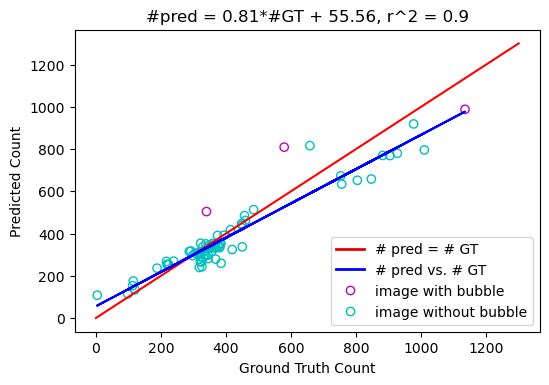

In [6]:
plt.figure(figsize=(6,4), dpi=100)
plt.scatter(gt_counts, pred_counts, facecolor='None', edgecolor=colors)
plt.plot([0, 1300], [0, 1300], color='r')
plt.xlabel('Ground Truth Count')
plt.ylabel('Predicted Count')

slope, intercept, r_value, p_value, std_err = linregress(gt_counts, pred_counts)
plt.plot(gt_counts, intercept + [slope*x for x in gt_counts], color='blue')
plt.title('#pred = %s*#GT + %s, r^2 = %s' % (str(round(slope,2)), str(round(intercept,2)), str(round(r_value**2,2))))

handle_list = []
handle_list.append(Line2D([0],[0], marker=None, color='xkcd:red', lw=2, label='# pred = # GT'))
handle_list.append(Line2D([0],[0], marker=None, color='blue', lw=2, label='# pred vs. # GT'))
handle_list.append(Line2D([0],[0], marker='o', color='None',
                          markerfacecolor='None', markeredgecolor='m', label='image with bubble'))
handle_list.append(Line2D([0],[0], marker='o', color='None',
                          markerfacecolor='None', markeredgecolor='c', label='image without bubble'))
plt.legend(handles=handle_list, loc='lower right', fontsize=10)

plt.show()

Observation: The images with bubbles (in magenta) tend to be far from the rest of the images.

### Using a different intensity threshold for images with bubbles
threshold = 0.03

In [1]:
gt_counts, pred_counts, colors = [], [], []
for i in range(len(names)):
    print(i, '/', len(names))
    name = names[i]
    im = imread('raw_images_cropped/image-cropped-%s.tif' % name)
    df = pd.read_csv('./all_test_gt_complete/image-cropped-rescaled-%s.csv' % name)
    if name in bubble_image_names:
        colors.append('m')
        threshold = 0.1
    else:
        colors.append('c')
        threshold = 0.03
    blobs = blob_dog(im, min_sigma=5, max_sigma=15, threshold=threshold)
    gt_counts.append(len(df))
    pred_counts.append(len(blobs))

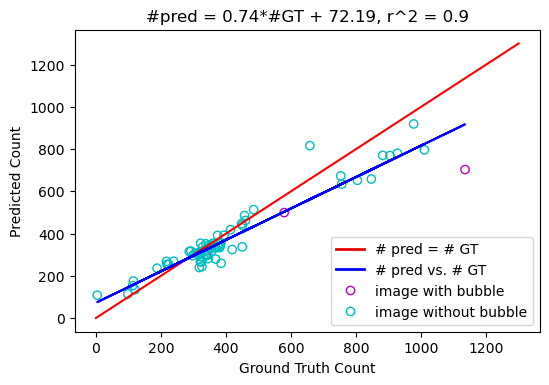

In [8]:
plt.figure(figsize=(6,4), dpi=100)
plt.scatter(gt_counts, pred_counts, facecolor='None', edgecolor=colors)
plt.plot([0, 1300], [0, 1300], color='r')
plt.xlabel('Ground Truth Count')
plt.ylabel('Predicted Count')

slope, intercept, r_value, p_value, std_err = linregress(gt_counts, pred_counts)
plt.plot(gt_counts, intercept + [slope*x for x in gt_counts], color='blue')
plt.title('#pred = %s*#GT + %s, r^2 = %s' % (str(round(slope,2)), str(round(intercept,2)), str(round(r_value**2,2))))

handle_list = []
handle_list.append(Line2D([0],[0], marker=None, color='xkcd:red', lw=2, label='# pred = # GT'))
handle_list.append(Line2D([0],[0], marker=None, color='blue', lw=2, label='# pred vs. # GT'))
handle_list.append(Line2D([0],[0], marker='o', color='None',
                          markerfacecolor='None', markeredgecolor='m', label='image with bubble'))
handle_list.append(Line2D([0],[0], marker='o', color='None',
                          markerfacecolor='None', markeredgecolor='c', label='image without bubble'))
plt.legend(handles=handle_list, loc='lower right', fontsize=10)

plt.show()

### Using a different intensity threshold for images with bubbles and with linear transformation

In [9]:
# from above, with bubble detection and without linear transformation
slope_use, intercept_use = slope, intercept

In [3]:
gt_counts, pred_counts, colors = [], [], []
for i in range(len(names)):
    print(i, '/', len(names))
    name = names[i]
    im = imread('raw_images_cropped/image-cropped-%s.tif' % name)
    df = pd.read_csv('./all_test_gt_complete/image-cropped-rescaled-%s.csv' % name)
    if name in bubble_image_names:
        colors.append('m')
        threshold = 0.1
    else:
        colors.append('c')
        threshold = 0.03
    blobs = blob_dog(im, min_sigma=5, max_sigma=15, threshold=threshold)
    gt_counts.append(len(df))
    count_blobs_raw = len(blobs)
    count_blobs = (count_blobs_raw - intercept_use)/slope_use
    pred_counts.append(count_blobs)

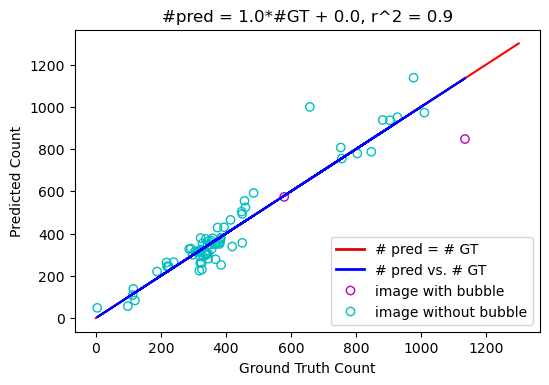

In [11]:
plt.figure(figsize=(6,4), dpi=100)
plt.scatter(gt_counts, pred_counts, facecolor='None', edgecolor=colors)
plt.plot([0, 1300], [0, 1300], color='r')
plt.xlabel('Ground Truth Count')
plt.ylabel('Predicted Count')

slope, intercept, r_value, p_value, std_err = linregress(gt_counts, pred_counts)
plt.plot(gt_counts, intercept + [slope*x for x in gt_counts], color='blue')
plt.title('#pred = %s*#GT + %s, r^2 = %s' % (str(round(slope,2)), str(round(intercept,2)), str(round(r_value**2,2))))

handle_list = []
handle_list.append(Line2D([0],[0], marker=None, color='xkcd:red', lw=2, label='# pred = # GT'))
handle_list.append(Line2D([0],[0], marker=None, color='blue', lw=2, label='# pred vs. # GT'))
handle_list.append(Line2D([0],[0], marker='o', color='None',
                          markerfacecolor='None', markeredgecolor='m', label='image with bubble'))
handle_list.append(Line2D([0],[0], marker='o', color='None',
                          markerfacecolor='None', markeredgecolor='c', label='image without bubble'))

plt.legend(handles=handle_list, loc='lower right', fontsize=10)

plt.show()

blob_dog() is 4 times faster than blob_log(). Using separate intensity thresholds for images with and without bubbles, and linear transforming the results (using slope and y-intercept from results without bubble detection), predicted counts vs. ground truth counts has a regression line with a slope of 1, a y-intercept of 0, and an r^2 of 0.95.